In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import load_digits
from sklearn.decomposition import  PCA
from sklearn import preprocessing

from skimage.transform import resize
import scipy as sp

In [2]:
matplotlib.rcParams['figure.figsize'] = (1, 1)
digits = load_digits()
X = digits.data#data
X1 = X
Y= digits.target#class0-9
#print(X.shape)
#print(Y.shape)
n_samples = X.shape[0]


In [3]:
np.random.seed(1)
samples_to_plot = 10
indexes = np.random.randint(0, high=n_samples, size= [samples_to_plot])
print(indexes)

[1061  235 1096 1791  905  715 1669  847  960  144]


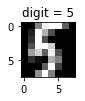

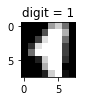

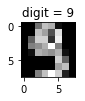

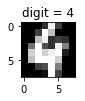

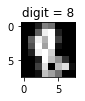

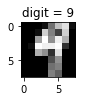

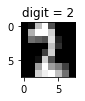

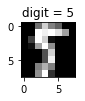

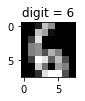

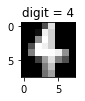

In [5]:
for idx in indexes:
    plt.imshow(np.reshape(X[idx,:], (8,8)),cmap= 'gray' )
    plt.title('digit = {}'.format(str(Y[idx])))
    plt.show()

In [7]:
X_noisy = X + 2.5*np.random.randn(X.shape[0], X.shape[1])#x_noisy是加了噪声的
X_c = X_noisy - np.mean(X_noisy, axis=0)#Xn-X(average)---S

In [8]:
#ANSWER OF QUESTION 1


X_co=np.zeros((64,64))
for i in range(1797):
    X_co+=X_c[i,:].reshape(64,1).dot((X_c[i,:].reshape(64,1)).T)
eig_val, eig_vec = np.linalg.eigh(X_co)
E_co=[0]*64
for i in range(64):
    E_co[i]=eig_val[63-i]
eig_pairs_co = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]
eig_pairs_co = sorted(eig_pairs_co, key=lambda k: k[0], reverse=True)

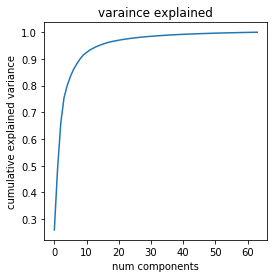

In [9]:
E_cumsum = np.cumsum(np.power(E_co,2))
total_variance = np.sum(E_co)
plt.figure(figsize=(4,4))
plt.plot(E_cumsum/E_cumsum[-1])
plt.title('varaince explained')
plt.xlabel('num components')
plt.ylabel('cumulative explained variance')
plt.show()

57


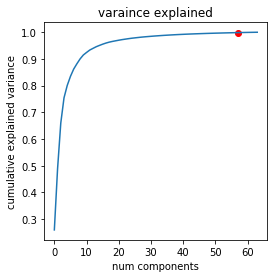

In [10]:
index_90_per = int(len(E_cumsum)*.9)
print(index_90_per)
plt.figure(figsize=(4,4))
plt.plot(index_90_per, E_cumsum[index_90_per]/E_cumsum[-1], 'ro')
plt.plot(E_cumsum/E_cumsum[-1])
plt.title('varaince explained')
plt.xlabel('num components')
plt.ylabel('cumulative explained variance')
plt.show()

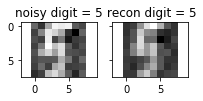

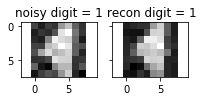

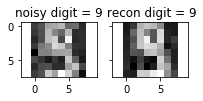

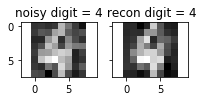

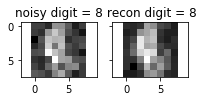

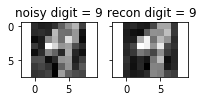

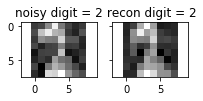

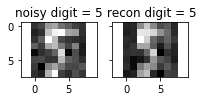

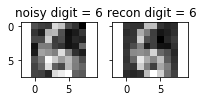

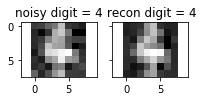

In [11]:
W_co=[]
W_co = np.hstack((eig_pairs_co[0][1].reshape(64,1), eig_pairs_co[1][1].reshape(64,1)))
for i in range(23):
    W_co=np.hstack((W_co, eig_pairs_co[i+2][1].reshape(64,1)))
X_proj_co= np.dot(X_noisy, W_co)
X_reconstructed_co = np.dot(X_proj_co,W_co.T)
for idx in indexes:
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize= (3,1))
    ax1.imshow(np.reshape(X_noisy[idx,:], (8,8)),cmap= 'gray' )
    ax1.set_title('noisy digit = {}'.format(str(Y[idx])))
    ax2.imshow(np.reshape(X_reconstructed_co[idx,:], (8,8)),cmap= 'gray' )
    ax2.set_title(' recon digit = {}'.format(str(Y[idx])))
    # Fine-tune figure; make subplots farther from each other.
    f.subplots_adjust(hspace=2.0)
    plt.show()

/Users/hdc/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


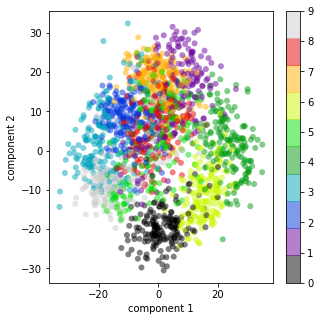

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(X_proj_co[:, 0], X_proj_co[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

/Users/hdc/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


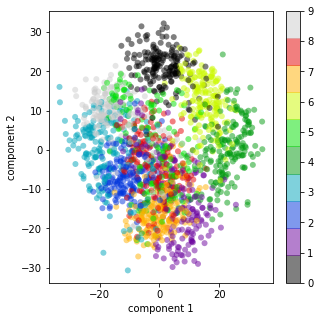

In [13]:
#ANSWER OF QUESTION 2


pca = PCA(n_components=25)
X_pca= pca.fit_transform(X_noisy)
plt.figure(figsize=(5,5))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [14]:
#------ANSWER OF LDA


mean_vectors=[]
for _class in range(0,10):
    mean_vectors.append(np.mean(X[Y==_class], axis=0))
    #print('class conditional mean vector for %s:  %s\n' %(_class, mean_vectors[_class]))

In [15]:
S_W=np.zeros((64,64))
for _class,_mean_vectors in zip(range(0,10),mean_vectors):
    S_K=np.zeros((64,64))
    for row in X[Y==_class]:
        row,_mean_vectors = row.reshape(64,1),_mean_vectors.reshape(64,1)
        S_K+=(row-_mean_vectors).dot((row-_mean_vectors).T)
    S_W+=S_K
#print(S_W)    

In [16]:
global_mean=np.mean(X,axis=0)
S_B=np.zeros((64,64))
for i,_mean_vectors in enumerate(mean_vectors):
    N_C=X[Y==i,:].shape[0]
    _mean_vectors=_mean_vectors.reshape(64,1)
    global_mean=global_mean.reshape(64,1)
    S_B+=N_C*(_mean_vectors-global_mean).dot((_mean_vectors-global_mean).T)
#print(S_B)    

In [17]:
eig_vals,eig_vecs = np.linalg.eigh(S_B-S_W)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

In [18]:
W=[]
W = np.hstack((eig_pairs[0][1].reshape(64,1), eig_pairs[1][1].reshape(64,1)))
for i in range(25):
    W=np.hstack((W, eig_pairs[i+2][1].reshape(64,1)))   
X_proj_lda= np.dot(X, W)
X_reconstructed_lda = np.dot(X_proj_lda,W.T)

/Users/hdc/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


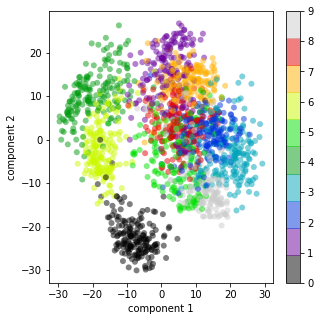

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(X_proj_lda[:, 0], X_proj_lda[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

/Users/hdc/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


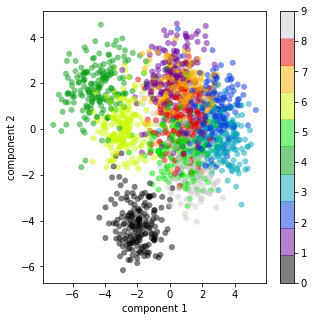

In [20]:
#----SKLEARN LDA

lda = LDA(n_components=25)
lda.fit(X_noisy,Y)
X_lda= lda.fit_transform(X_noisy,Y)
plt.figure(figsize=(5,5))
plt.scatter(X_lda[:, 0], X_lda[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [39]:

X1 = np.zeros((X.shape[0], 36))
for i in range(X.shape[0]):
    x = resize(np.reshape(X[i], (8,8)), (6,6))
    X1[i] = x.reshape((-1))


/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/si

/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/si

/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/si

/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/si

/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/si

/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/si

/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/si

/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/si

/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/si

/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/si

/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/si

/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/hdc/anaconda/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


/Users/hdc/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


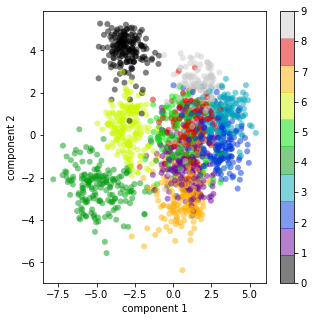

In [22]:
lda = LDA(n_components=25)
lda.fit(X1,Y)
X_lda= lda.fit_transform(X1,Y)
plt.figure(figsize=(5,5))
plt.scatter(X_lda[:, 0], X_lda[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

/Users/hdc/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/hdc/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


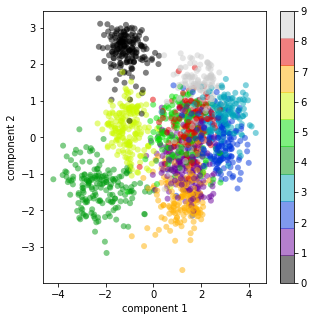

In [76]:

mean_vectorsr=[]
for _class in range(0,10):
    mean_vectorsr.append(np.mean(X1[Y==_class], axis=0))
    
S_Wr=np.zeros((36,36))
for _class,_mean_vectors in zip(range(10),mean_vectorsr):
    S_Kr=np.zeros((36,36))
    for row in X1[Y==_class]:
        row,_mean_vectors = row.reshape(36,1),_mean_vectors.reshape(36,1)
        S_Kr+=(row-_mean_vectors).dot((row-_mean_vectors).T)
    S_Wr+=S_Kr
#print(S_W) 

global_meanr=np.mean(X1,axis=0)
S_Br=np.zeros((36,36))
for i,_mean_vectors in zip(range(10),mean_vectorsr):
    N_Cr=X1[Y==i,:].shape[0]
    _mean_vectors=_mean_vectors.reshape(36,1)
    global_meanr=global_meanr.reshape(36,1)
    S_Br+=N_Cr*(_mean_vectors-global_meanr).dot((_mean_vectors-global_meanr).T)
#print(S_B)  




eig_valsr,eig_vecsr = np.linalg.eig(np.linalg.inv(S_Wr).dot(S_Br))
idx=eig_valsr.argsort()[::-1]
eig_vecsr=eig_vecsr[:,idx]


X_proj_ldar= np.dot(X1, eig_vecsr)

plt.figure(figsize=(5,5))
plt.scatter(X_proj_ldar[:, 0], X_proj_ldar[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();    